# Demo Percolation

This is a small exercise to plot street segments of Singapore that are shorter than a certain threshold.

## Background
The idea comes from percolation theroy in statistical physics and has been used applied to study road networks.
In percolation theory, sites/nodes are considered connected by an edge/link, if the probability of permitting flows is below a certain percolation threshold *p*.

## Conceptualisation
We first construct the road network where *nodes (N)* are street intersections, *edges (E)* are the road segments, and *weights (W)* are the road segment length. Weights are interpreted as cost of traversing respective edges, and hence, a function of probability of permitting flows between nodes.

By altering the value of p, we observe the changing state of network from a mostly connected state to a fully disconnected state. The results should be further interpreted against principles of network formation.

In [1]:
import geopandas
import matplotlib.pyplot as plt

In [2]:
# reading the shape file of a processed road network
road_network = geopandas.read_file(r"C:\Users\ytxu\Documents\ArcGIS\Projects\MastersThesis\RoadSectionLine.shp")

In [3]:
road_network.head()

,Shape_Leng,ObjID,InverseShp,NormShpLen,geometry
0,119.569534,1,0.008363,0.988260,"LINESTRING (30753.623 35157.066, 30753.074 351..."
1,141.309657,2,0.007077,0.990154,"LINESTRING (19752.711 37402.305, 19894.016 374..."
2,170.179893,3,0.005876,0.992670,"LINESTRING (15119.533 34392.484, 15101.693 343..."
3,485.052445,4,0.002062,1.020109,"LINESTRING (24513.967 29312.361, 24532.547 293..."
4,69.158849,5,0.014459,0.983867,"LINESTRING (22894.045 33858.215, 22901.695 339..."


In [4]:
length_list = sorted(list(road_network['Shape_Leng']), reverse=True)

In [5]:
# the list of percolation threshold values here are arbitrarily selected for demo purpose
selected_perc_lim = [length_list[l] for l in range(len(length_list)) if l in [0, 150, 400, 
                                                                       600,  800, 1000, 1200,
                                                                       1500, 2000, 3000, 
                                                                       5000, 8000]]

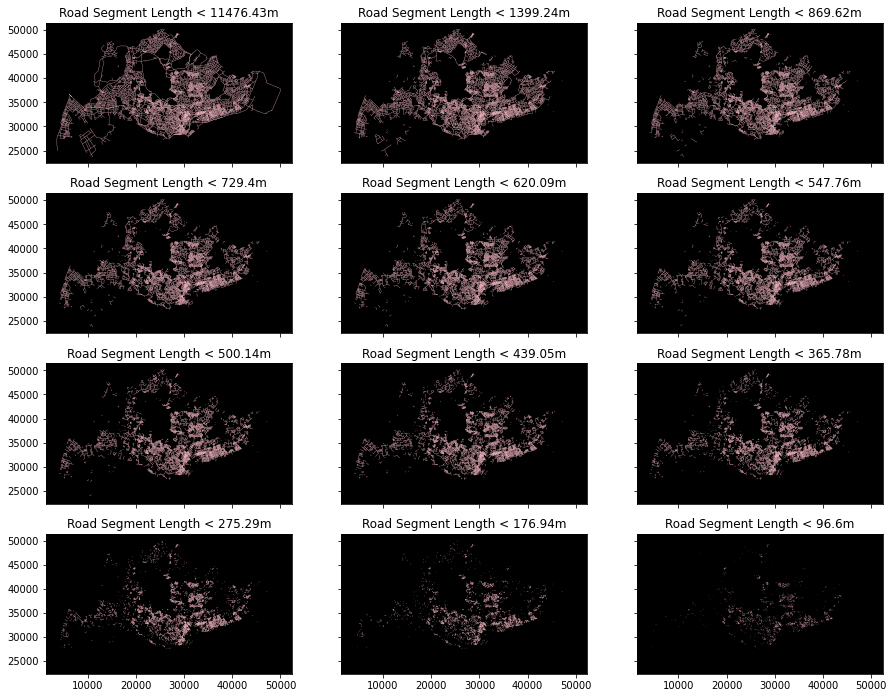

In [8]:
fig, axs = plt.subplots(4, 3, figsize=(15,12), sharex=True, sharey=True)
n = 0
for perc_lim in selected_perc_lim:
    # subset the dataframe
    segmented_df = road_network[road_network['Shape_Leng'] < perc_lim]
    # initialise the subplot
    n_ax = axs[int(n/3),n%3]
    # plot the dataframe subset
    segmented_df.plot(ax=n_ax, linewidth=0.3, color='pink')
    n_ax.title.set_text('Road Segment Length < {}m'.format(round(perc_lim, 2)))
    n_ax.set_facecolor('black')
    n += 1